<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/PDF_Extract_Fall_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PDF Plumber

In [1]:
!pip install pdfplumber

     |████████████████████████████████| 45 kB 1.5 MB/s 
     |████████████████████████████████| 5.6 MB 28.7 MB/s 
     |████████████████████████████████| 139 kB 45.8 MB/s 
     |████████████████████████████████| 1.9 MB 41.5 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.28-py3-none-any.whl size=32240 sha256=e9afa7a147becff568d3ee1fda56e4973396f08dbf7c04c2bc725bbec184575e
  Stored in directory: /root/.cache/pip/wheels/f2/b1/a0/c0a77b756d580f53b3806ae0e0b3ec945a8d05fca1d6e10cc1
Successfully built pdfplumber


In [2]:
import pdfplumber
with pdfplumber.open("attention.pdf") as pdf:
    page  = pdf.pages[0]
    text = page.chars[0]
    print(text)

{'fontname': 'RCUMTF+NimbusRomNo9L-Medi', 'adv': Decimal('12.430'), 'upright': True, 'x0': Decimal('211.488'), 'y0': Decimal('675.355'), 'x1': Decimal('223.918'), 'y1': Decimal('692.570'), 'width': Decimal('12.430'), 'height': Decimal('17.215'), 'size': Decimal('17.215'), 'object_type': 'char', 'page_number': 1, 'stroking_color': 0, 'non_stroking_color': 0, 'text': 'A', 'top': Decimal('99.430'), 'bottom': Decimal('116.645'), 'doctop': Decimal('99.430')}


In [4]:
!pip install PyMuPDF
!pip install pillow
!pip install pymupdf-fonts 

     |████████████████████████████████| 6.4 MB 18.4 MB/s 
     |████████████████████████████████| 2.8 MB 27.0 MB/s 


In [5]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (359 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [6]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 63.6 MB 8.6 kB/s 


In [7]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [8]:
reader=easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [9]:
images = convert_from_path('attention.pdf')

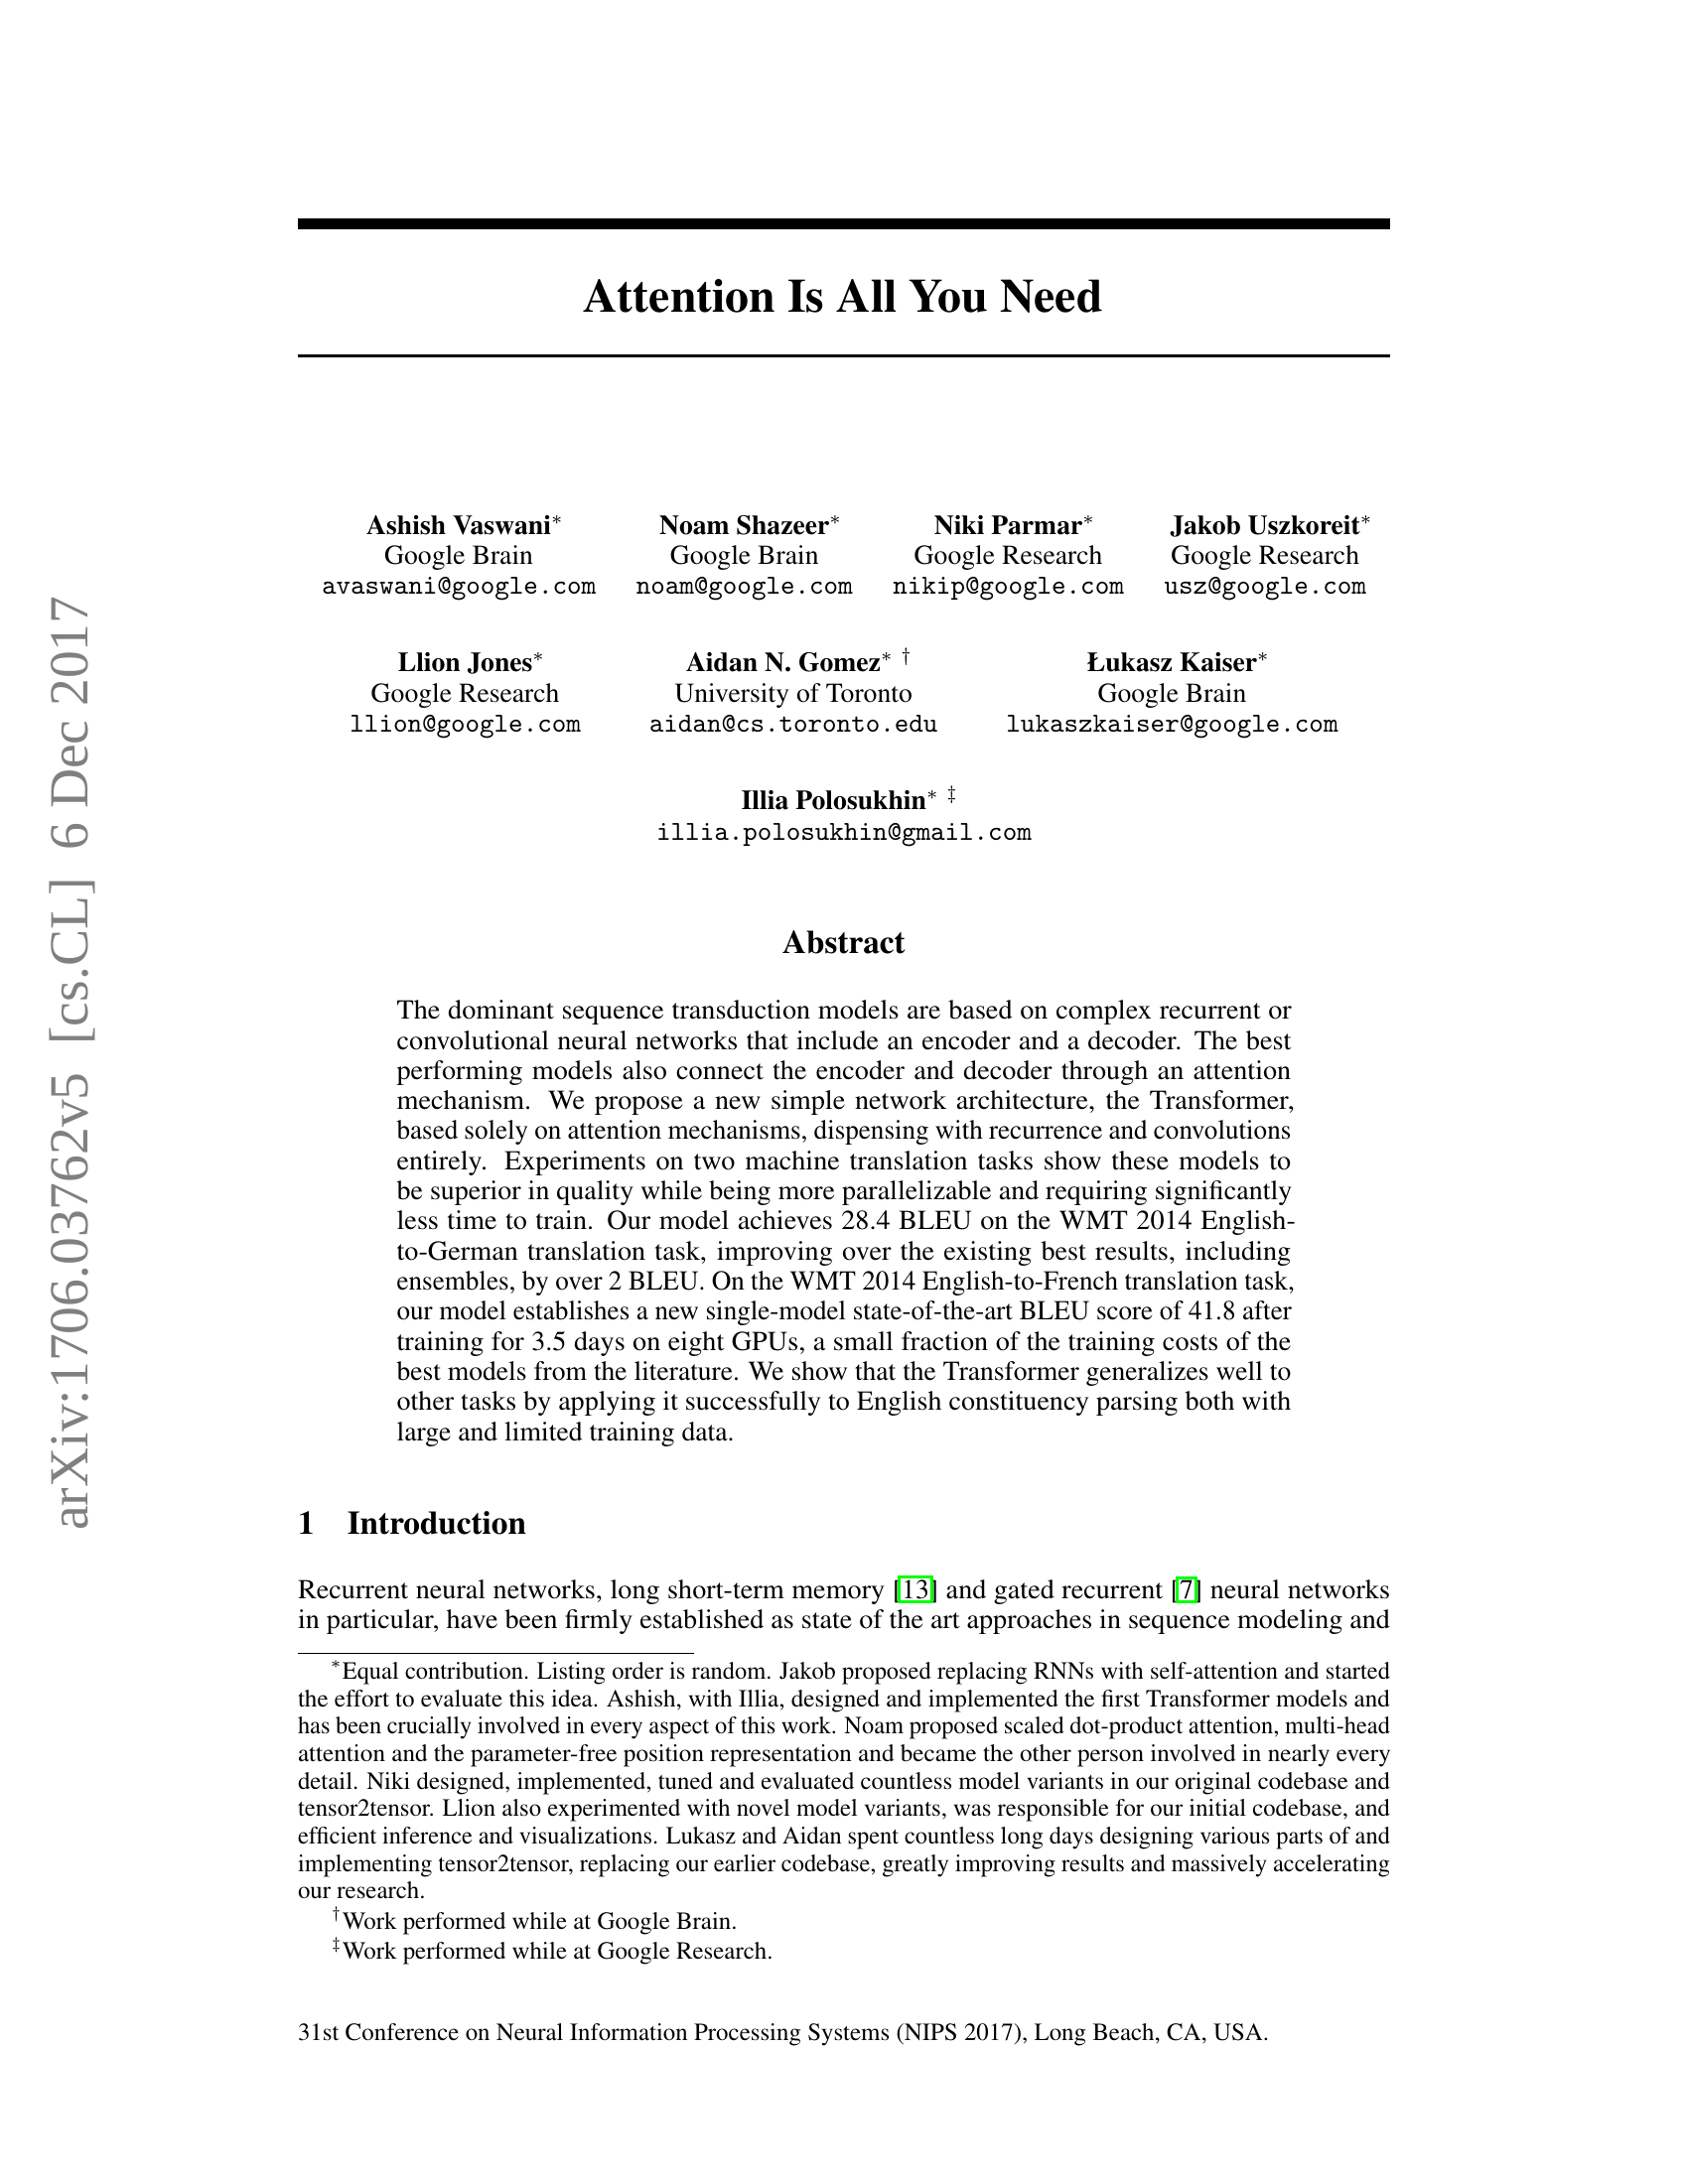

In [10]:
from IPython.display import display, Image 
display(images[0])

In [11]:
bounds = reader.readtext(np.array(images[0]),min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8)
bounds

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[586, 274], [1116, 274], [1116, 322], [586, 322]],
  'Attention Is All You Need',
  0.5345810919336591),
 ([[368, 514], [558, 514], [558, 544], [368, 544]],
  'Ashish Vaswani',
  0.9173051771683187),
 ([[662, 514], [838, 514], [838, 544], [662, 544]],
  'Noam Shazeer',
  0.8793502329607361),
 ([[938, 516], [1094, 516], [1094, 542], [938, 542]],
  'Niki Parmar',
  0.935491384408255),
 ([[1176, 513], [1383, 513], [1383, 546], [1176, 546]],
  'Jakob Uszkoreit*',
  0.6710093745918249),
 ([[383, 545], [541, 545], [541, 581], [383, 581]],
  'Google Brain',
  0.9998002881679157),
 ([[672, 546], [828, 546], [828, 578], [672, 578]],
  'Google Brain',
  0.9990559995329158),
 ([[917, 545], [1113, 545], [1113, 581], [917, 581]],
  'Google Research',
  0.7325136297360176),
 ([[1177, 545], [1373, 545], [1373, 581], [1177, 581]],
  'Google Research',
  0.9187121523133165),
 ([[322, 578], [602, 578], [602, 608], [322, 608]],
  'avaswani@google . com',
  0.7111753136116307),
 ([[638, 578], [862, 578

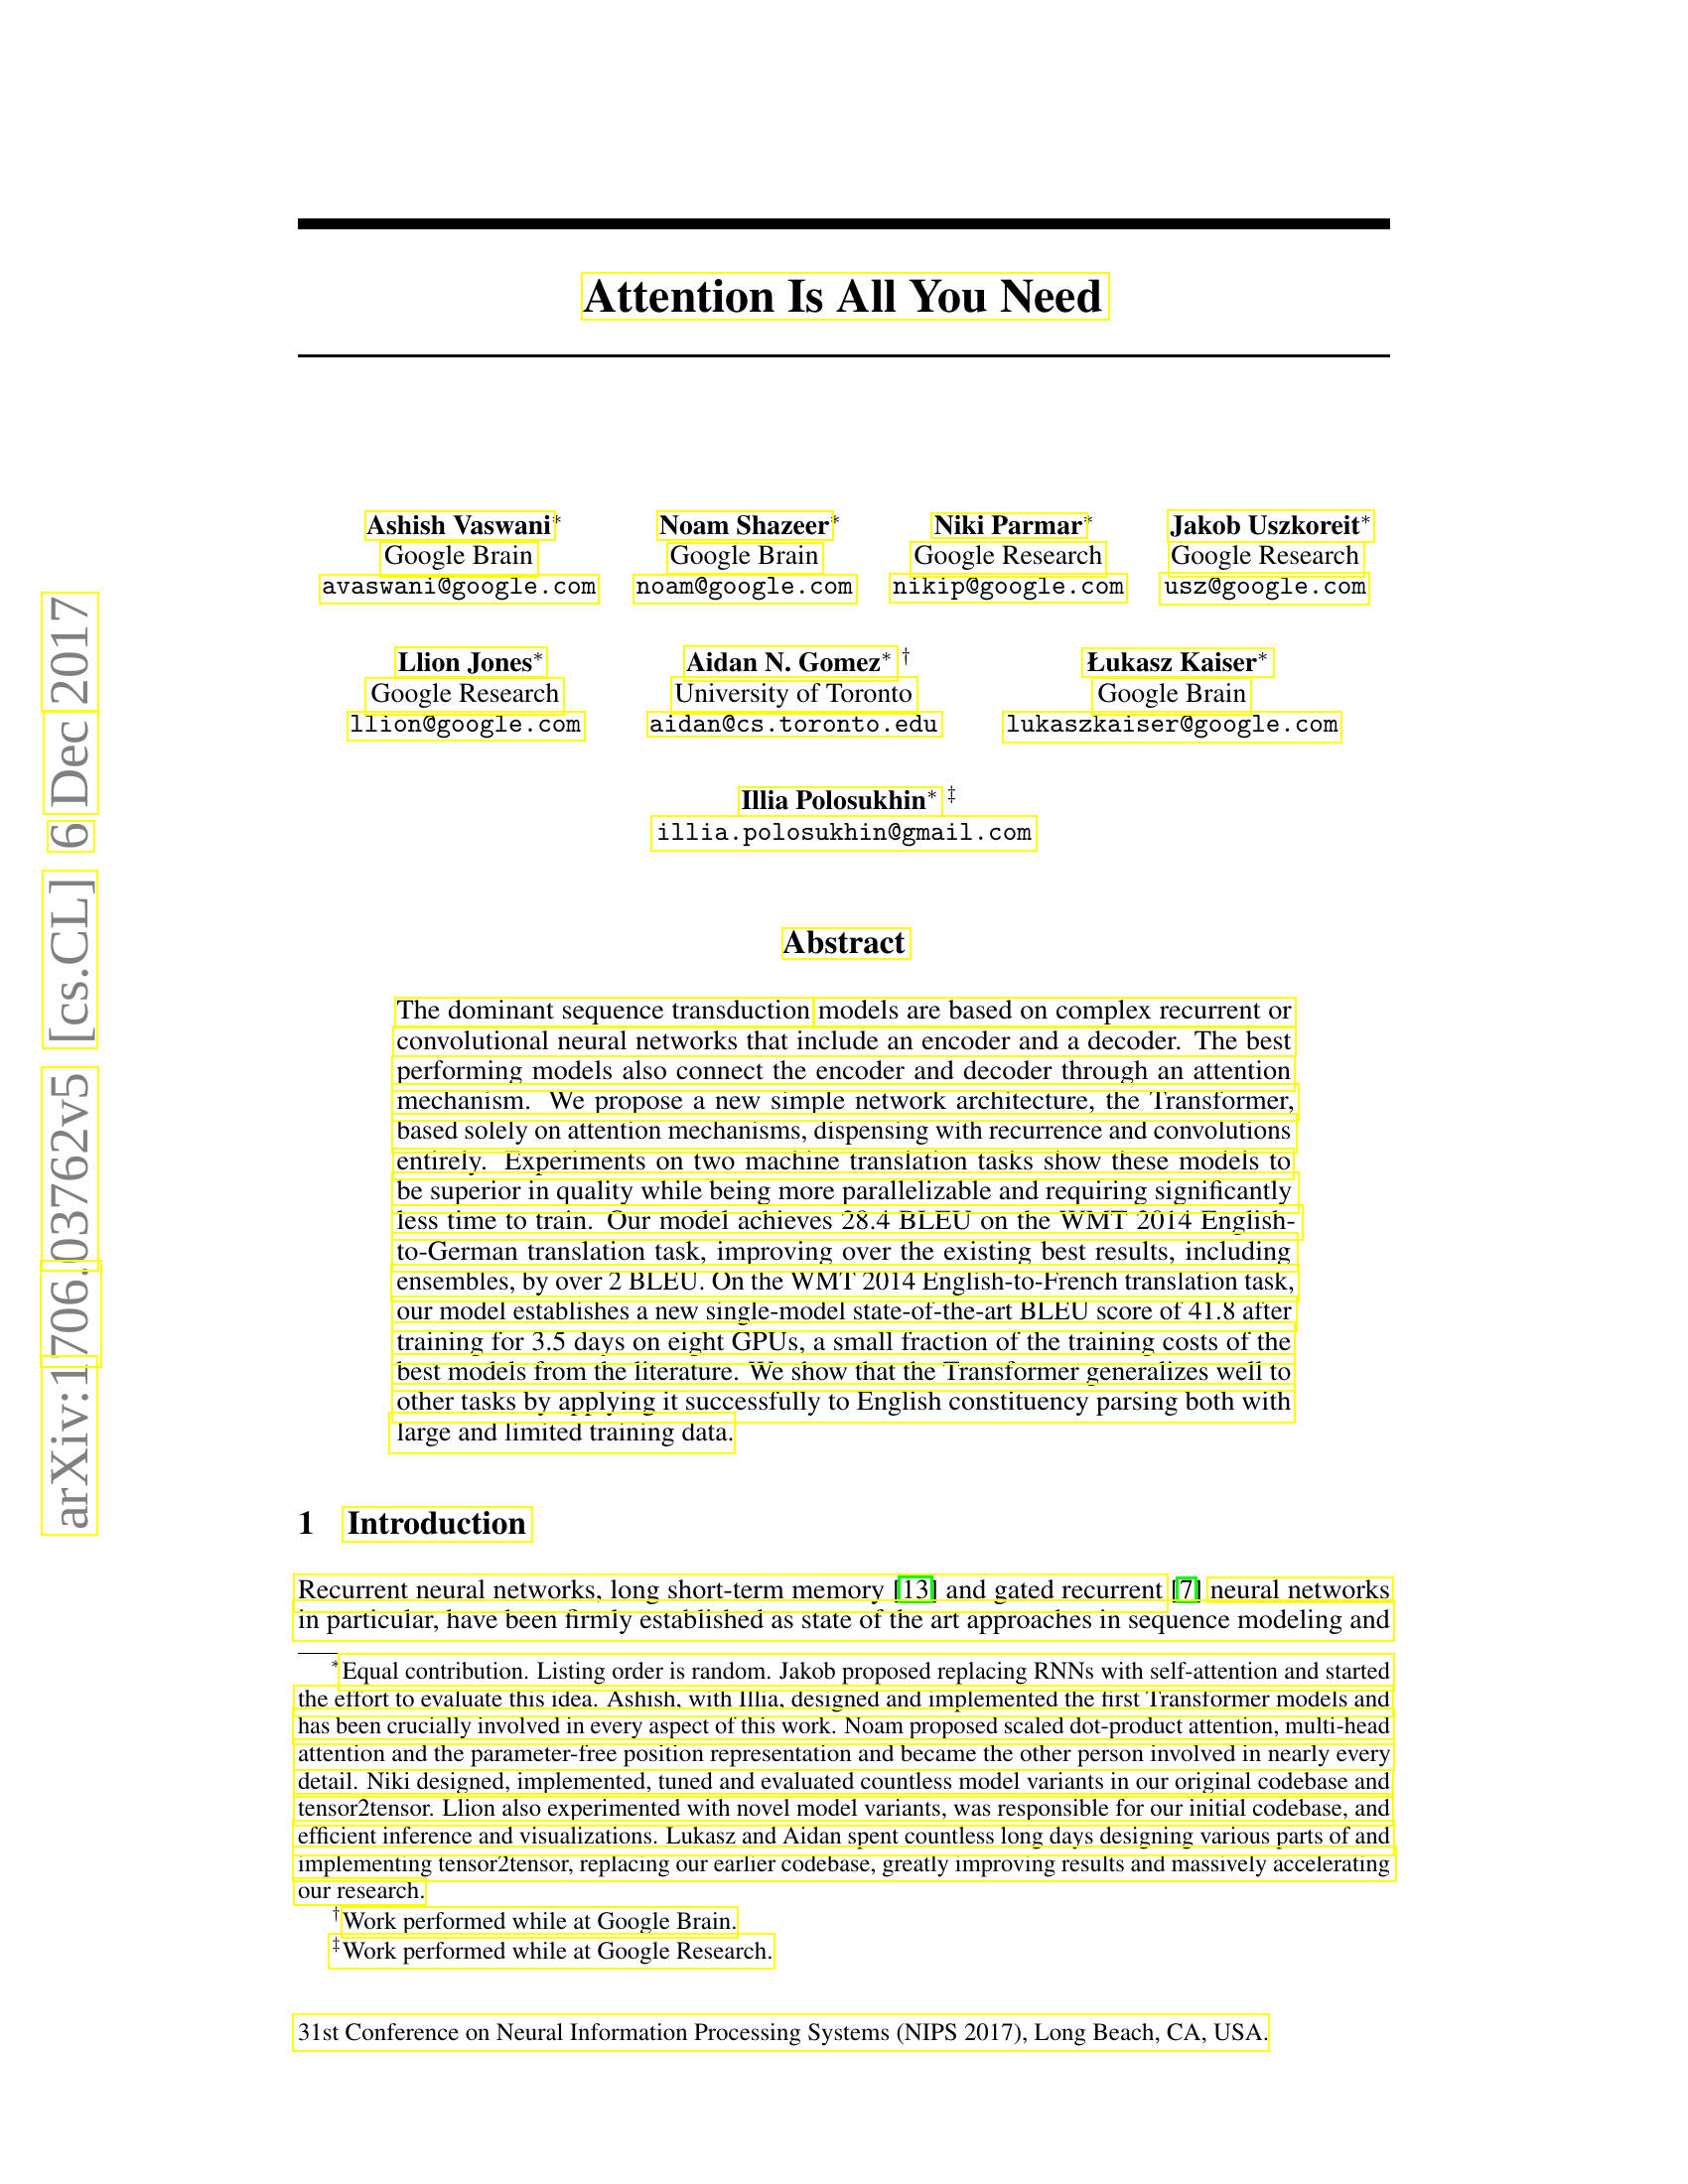

In [13]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw =ImageDraw.Draw(image)
  for bound in bounds: 
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image 

draw_boxes(images[0], bounds)


In [14]:
bounds[1][1]

'Ashish Vaswani'

In [15]:
bounds

[([[586, 274], [1116, 274], [1116, 322], [586, 322]],
  'Attention Is All You Need',
  0.5345810919336591),
 ([[368, 514], [558, 514], [558, 544], [368, 544]],
  'Ashish Vaswani',
  0.9173051771683187),
 ([[662, 514], [838, 514], [838, 544], [662, 544]],
  'Noam Shazeer',
  0.8793502329607361),
 ([[938, 516], [1094, 516], [1094, 542], [938, 542]],
  'Niki Parmar',
  0.935491384408255),
 ([[1176, 513], [1383, 513], [1383, 546], [1176, 546]],
  'Jakob Uszkoreit*',
  0.6710093745918249),
 ([[383, 545], [541, 545], [541, 581], [383, 581]],
  'Google Brain',
  0.9998002881679157),
 ([[672, 546], [828, 546], [828, 578], [672, 578]],
  'Google Brain',
  0.9990559995329158),
 ([[917, 545], [1113, 545], [1113, 581], [917, 581]],
  'Google Research',
  0.7325136297360176),
 ([[1177, 545], [1373, 545], [1373, 581], [1177, 581]],
  'Google Research',
  0.9187121523133165),
 ([[322, 578], [602, 578], [602, 608], [322, 608]],
  'avaswani@google . com',
  0.7111753136116307),
 ([[638, 578], [862, 578

In [16]:
text = ''

for i in range(len(bounds)):
  text=text+bounds[i][1] +'\n'

print(text)

Attention Is All You Need
Ashish Vaswani
Noam Shazeer
Niki Parmar
Jakob Uszkoreit*
Google Brain
Google Brain
Google Research
Google Research
avaswani@google . com
noam@google. com
nikipegoogle . com
usz@google . com
3
Llion Jones *
Aidan N. Gomez*
Eukasz Kaiser*
Google Research
University of Toronto
Google Brain
llion@google . com
aidan@cs. toronto. edu
lukaszkaiser@google . com
8
Illia Polosukhin *
CO
illia polosukhin@gmail . com
8
The dominant sequence transduction
Abstract
models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder:  The best
performing models also connect the encoder and decoder through an attention
mechanism.   We propose a new simple network architecture, the Transformer;
based solely on attention mechanisms, dispensing with recurrence and convolutions
3
entirely.   Experiments on two machine translation tasks show these models to
be superior in quality while being more parallelizable and requiring significantly
le

In [17]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

In [18]:
from spacy import displacy 

displacy.render(nlp(doc.text), style='ent', jupyter=True)